In [2]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

from keras.preprocessing.image import ImageDataGenerator


2023-01-13 17:49:28.443281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Navigating to the right directory and make sure everything is properly imported

In [3]:
pwd

'/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project)'

In [4]:
cd ..

/Users/kamwingsze/GA


In [5]:
cd project-capstone (Illuminado Capstone Project) *Part 1 - binary classification

/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 1 - binary classification


In [6]:
cd Train Set

[Errno 2] No such file or directory: 'Train Set'
/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 1 - binary classification


In [7]:
pwd

'/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 1 - binary classification'

In [8]:
cd ..

/Users/kamwingsze/GA


In [9]:
im = plt.imread('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project)/Train Set/Yes_Disease/1.png')

In [10]:
im.shape

(1424, 2144, 3)

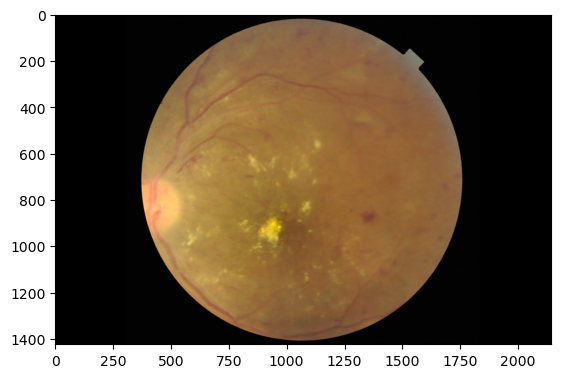

In [11]:
plt.imshow(im)

In [12]:
pwd

'/Users/kamwingsze/GA'

In [13]:
rm -rf .ipynb_checkpoints/

In [73]:
#ls -a

In [15]:
cd ..


/Users/kamwingsze


In [16]:
cd Test Set

[Errno 2] No such file or directory: 'Test Set'
/Users/kamwingsze


In [74]:
#ls -a

In [18]:
rm -rf .ipynb_checkpoints/

# Training Set

In [6]:
train_gen = ImageDataGenerator(rescale = 1/255.)

In [7]:
train_data = train_gen.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project)/Train Set/')

Found 1920 images belonging to 2 classes.


# Testing Set

In [8]:
test_data = train_gen.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project)/Test Set')

Found 640 images belonging to 2 classes.


In [9]:
# With the ImageDataGenerator - It has already split the dataset into X_train and y_train / X_test and y_test


# Basic Network (Rough testing)

In [11]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
#model = Sequential()
#model.add(Flatten())
#model.add(Dense(100, activation = 'relu'))
#model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#loss function
#model.compile(loss = 'bce', metrics = ['acc'])

In [112]:
# model.fit(train_data, epochs =2)
#Too slow and it takes a lot of time to load

history = model.fit(train_data, 
                    batch_size=256,
                    validation_data= test_data,
                    epochs=10,
                    verbose=1)

In [1]:
# Check out our train loss and test loss over epochs.
#hisotry_df = pd.DataFrame(history.history)
#hisotry_df.filter(like='loss').plot(xlabel='Epoch',
                                 #ylabel='Categorical Crossentropy',
                                 #title='Training and Testing Loss by Epoch',
                                 #xticks=history.epoch,
                                 #figsize=(12,8));

# Data Augmentation

In [12]:
train_augmented = ImageDataGenerator(rescale = 1/255.,
                                     shear_range= 0.1,
                                     zoom_range= 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True)

In [13]:
train_data_augmented = train_augmented.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project)/Train Set/')

Found 1920 images belonging to 2 classes.


In [14]:
test_augmented = ImageDataGenerator(rescale = 1/255.)

In [15]:
test_data_augmented = test_augmented.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project)/Test Set/')

Found 640 images belonging to 2 classes.


# A Basic Convolution Model (Testing purpose only)

In [10]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))


model.compile(loss='bce',
              optimizer='adam', metrics=['accuracy'])


In [11]:
hist = model.fit(train_data, validation_data = test_data, epochs = 3, verbose =1)

Epoch 1/3
60/60 [==============================] - 329s 5s/step - loss: 0.7020 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/3
60/60 [==============================] - 323s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/3
60/60 [==============================] - 322s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [83]:
X_test = model.predict(test_data_augmented)

20/20 [==============================] - 86s 4s/step


{'verbose': 1, 'epochs': 3, 'steps': 60}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


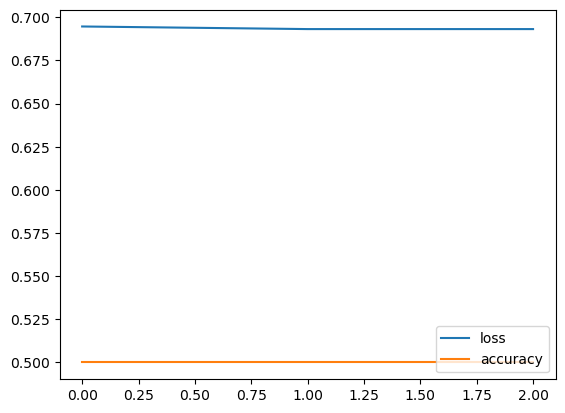

In [85]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

# 1. Tesing Out Prebuilt Networks -  InceptionV3 as convolution base

In [89]:
from keras.applications import MobileNetV2, VGG16, InceptionV3, Xception

In [90]:
conv_base = InceptionV3(include_top = False, input_shape =  (150, 150, 3), weights ='imagenet')

In [91]:
from keras.utils import plot_model

In [92]:
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# X-train, X-test, y-train, y-test

In [93]:
X_train = conv_base.predict(train_data_augmented)

60/60 [==============================] - 280s 5s/step


In [94]:
X_test = conv_base.predict(test_data_augmented)

20/20 [==============================] - 92s 5s/step


In [95]:
y_train = train_data_augmented.labels

In [96]:
y_test = test_data_augmented.labels

# Putting InceptionV3 in the convolutional network model

In [97]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D

In [98]:
from keras.utils import to_categorical

In [99]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(1, activation = 'sigmoid'))

In [100]:
from keras import metrics

In [101]:
import tensorflow
top_layer.compile(loss='bce',
              optimizer='adam', metrics = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR'), # precision-recall curve
])


In [102]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [103]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=50, verbose=1, callbacks = [early_stop])

Epoch 1/50
60/60 [==============================] - 4s 44ms/step - loss: 0.6343 - tp: 1500.0000 - fp: 394.0000 - tn: 7.0000 - fn: 19.0000 - accuracy: 0.7849 - precision: 0.7920 - recall: 0.9875 - auc: 0.4875 - prc: 0.7864 - val_loss: 0.5238 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.4832 - val_prc: 0.7727
Epoch 2/50
60/60 [==============================] - 2s 34ms/step - loss: 0.5188 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.7911 - precision: 0.7911 - recall: 1.0000 - auc: 0.5591 - prc: 0.8232 - val_loss: 0.5523 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.4595 - val_prc: 0.7740
Epoch 3/50
60/60 [==============================] - 2s 34ms/step - loss: 0.5007 - tp: 1519.0000 - fp: 399.0000 - tn: 2.0000 - fn: 0.0000e+00 - 

In [56]:
#model.summary()

{'verbose': 1, 'epochs': 50, 'steps': 60}
dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc'])


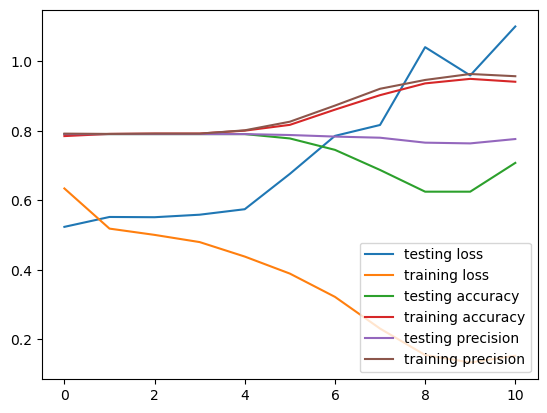

In [104]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['val_loss'], label = 'testing loss')
plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_accuracy'], label = 'testing accuracy')
plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_precision'], label ='testing precision')
plt.plot(hist.history['precision'], label ='training precision')
plt.legend(loc = 'lower right');

# Prediction

In [65]:
#im = plt.imread('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project)/Train Set/Yes_Disease/1.png')

In [71]:
#im = im.reshape(1424, 2144, 3)

In [77]:
#conv_base.predict(im)

In [45]:
pred = top_layer.predict(X_test)

20/20 [==============================] - 0s 7ms/step


In [76]:
#pred

In [75]:
#pred > 0.5

In [48]:
# The predicted images

In [49]:
y_pred = pd.DataFrame(pred > 0.5)[0].astype('int64').values
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
# The original labelled images

In [51]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

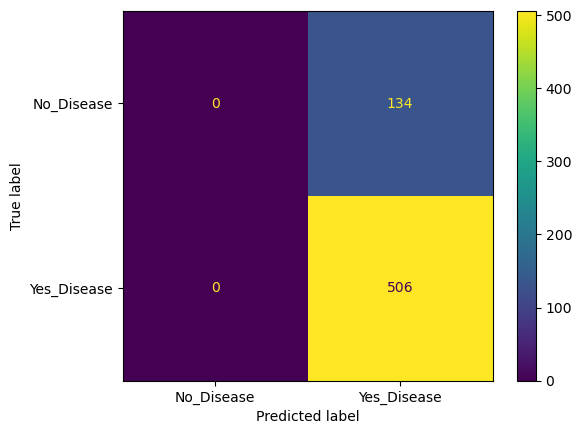

In [53]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No_Disease', 'Yes_Disease'])
cm_display.plot()

# 2. Tesing Out Prebuilt Networks -  Xception as convolution base

In [51]:
from keras.applications import Xception

In [52]:
conv_base = Xception(include_top = False, input_shape = (150, 150, 3))

In [53]:
from keras.utils import plot_model

In [54]:
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# X-train, X-test, y-train, y-test

In [61]:
X_train = conv_base.predict(train_data_augmented)

60/60 [==============================] - 299s 5s/step


In [62]:
X_test = conv_base.predict(test_data_augmented)

20/20 [==============================] - 98s 5s/step


In [63]:
y_train = train_data_augmented.labels

In [64]:
y_test = test_data_augmented.labels

# Putting Xception to work

In [65]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical
from keras import metrics

In [66]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(1, activation = 'sigmoid'))

In [67]:
import tensorflow
top_layer.compile(loss='bce',
              optimizer='adam', metrics = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR'), # precision-recall curve
])


In [68]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [69]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=50, verbose=1, callbacks = [early_stop])

Epoch 1/50
60/60 [==============================] - 5s 65ms/step - loss: 0.6424 - tp: 1494.0000 - fp: 394.0000 - tn: 7.0000 - fn: 25.0000 - accuracy: 0.7818 - precision: 0.7913 - recall: 0.9835 - auc: 0.5099 - prc: 0.7976 - val_loss: 0.5200 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.4832 - val_prc: 0.7719
Epoch 2/50
60/60 [==============================] - 3s 53ms/step - loss: 0.5257 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.7911 - precision: 0.7911 - recall: 1.0000 - auc: 0.5382 - prc: 0.8055 - val_loss: 0.5236 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.4719 - val_prc: 0.7725
Epoch 3/50
60/60 [==============================] - 3s 54ms/step - loss: 0.5123 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+0

{'verbose': 1, 'epochs': 50, 'steps': 60}
dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc'])


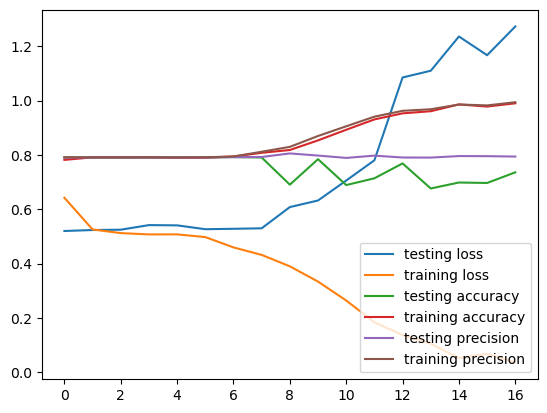

In [71]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['val_loss'], label = 'testing loss')
plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_accuracy'], label = 'testing accuracy')
plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_precision'], label ='testing precision')
plt.plot(hist.history['precision'], label ='training precision')
plt.legend(loc = 'lower right');

# Prediction

In [72]:
pred = top_layer.predict(X_test)

20/20 [==============================] - 0s 9ms/step


In [73]:
y_pred = pd.DataFrame(pred > 0.5)[0].astype('int64').values
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [74]:
y_test.mean()

0.790625

In [75]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [76]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

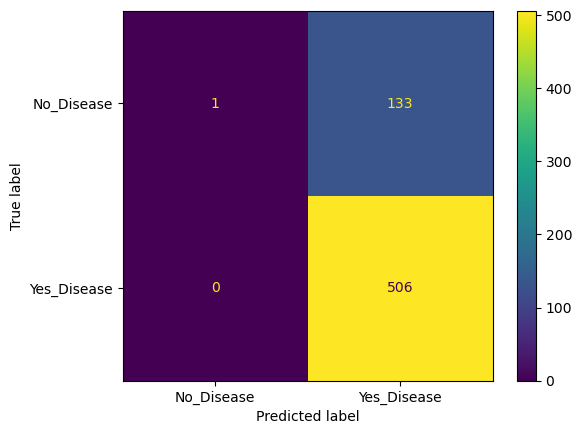

In [77]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No_Disease', 'Yes_Disease'])
cm_display.plot()

# 3. Tesing Out Prebuilt Networks -  VGG16 as convolution base


In [186]:
from keras.applications import VGG16

In [187]:
conv_base = VGG16(include_top = False, input_shape = (150, 150, 3))

In [188]:
from keras.utils import plot_model

In [189]:
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [190]:
# X-train, X-test, y-train, y-test

In [191]:
X_train = conv_base.predict(train_data_augmented)

60/60 [==============================] - 335s 6s/step


In [192]:
X_test = conv_base.predict(test_data_augmented)

20/20 [==============================] - 114s 6s/step


In [193]:
y_train = train_data_augmented.labels

In [194]:
y_test = test_data_augmented.labels

# Putting VGG16 to work

In [195]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical
from keras import metrics

In [196]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(1, activation = 'sigmoid'))

In [197]:
import tensorflow
top_layer.compile(loss='bce',
              optimizer='adam', metrics = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR'), # precision-recall curve
])


In [198]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=30, verbose=1)

Epoch 1/30
60/60 [==============================] - 5s 56ms/step - loss: 0.6752 - tp: 1460.0000 - fp: 379.0000 - tn: 22.0000 - fn: 59.0000 - accuracy: 0.7719 - precision: 0.7939 - recall: 0.9612 - auc: 0.5083 - prc: 0.7936 - val_loss: 0.5123 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.5404 - val_prc: 0.8236
Epoch 2/30
60/60 [==============================] - 3s 47ms/step - loss: 0.5149 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.7911 - precision: 0.7911 - recall: 1.0000 - auc: 0.5051 - prc: 0.8023 - val_loss: 0.5115 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.5387 - val_prc: 0.8270
Epoch 3/30
60/60 [==============================] - 3s 47ms/step - loss: 0.5185 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+

{'verbose': 1, 'epochs': 30, 'steps': 60}
dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc'])


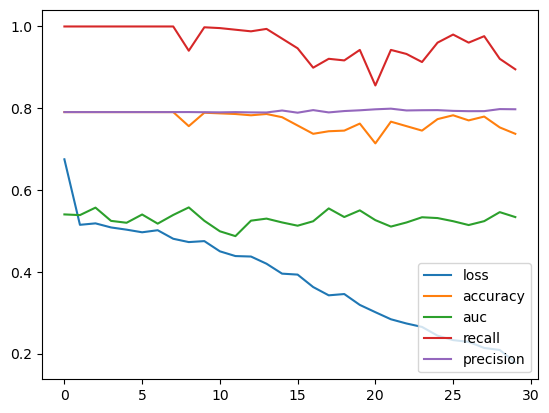

In [199]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.plot(hist.history['val_auc'], label ='auc')
plt.plot(hist.history['val_recall'], label ='recall')
plt.plot(hist.history['val_precision'], label ='precision')
plt.legend(loc = 'lower right');

# Prediction

In [200]:
pred = top_layer.predict(X_test)

20/20 [==============================] - 0s 5ms/step


In [201]:
y_pred = pd.DataFrame(pred > 0.5)[0].astype('int64').values
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [202]:
y_test.mean()

0.790625

In [203]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [206]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

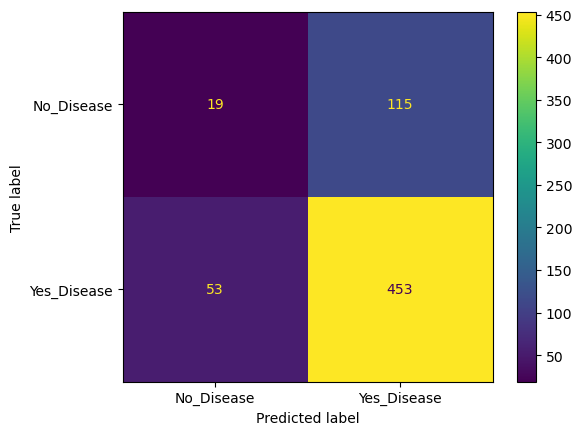

In [207]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No_Disease', 'Yes_Disease'])
cm_display.plot()

# 4. Tesing Out Prebuilt Networks -  MobileNetV2 as convolution base


In [208]:
from keras.applications import MobileNetV2

In [209]:
conv_base = MobileNetV2(include_top = False, input_shape = (224, 224, 3))

In [210]:
from keras.utils import plot_model

In [211]:
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [212]:
# X-train, X-test, y-train, y-test

In [232]:
X_train = conv_base.predict(train_data_augmented)
X_test = conv_base.predict(test_data_augmented)
y_train = train_data_augmented.labels
y_test = test_data_augmented.labels

20/20 [==============================] - 90s 4s/step


# Putting MobileNetV2 to work

In [233]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical

In [234]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(1, activation = 'sigmoid'))

In [245]:
import tensorflow
top_layer.compile(loss='bce',
              optimizer='adam', metrics = ['accuracy'])


In [246]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=30, verbose=1)

Epoch 1/30
60/60 [==============================] - 4s 55ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 2.9589 - val_accuracy: 0.7312
Epoch 2/30
60/60 [==============================] - 3s 50ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 2.5802 - val_accuracy: 0.7547
Epoch 3/30
60/60 [==============================] - 3s 49ms/step - loss: 0.0385 - accuracy: 0.9901 - val_loss: 2.1739 - val_accuracy: 0.7391
Epoch 4/30
60/60 [==============================] - 3s 50ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 2.5385 - val_accuracy: 0.7719
Epoch 5/30
60/60 [==============================] - 3s 50ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 2.5324 - val_accuracy: 0.7328
Epoch 6/30
60/60 [==============================] - 3s 51ms/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 2.4034 - val_accuracy: 0.7203
Epoch 7/30
60/60 [==============================] - 3s 49ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 1.9416 - val_accuracy: 0.7328
Epoch 8/30
60

{'verbose': 1, 'epochs': 30, 'steps': 60}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


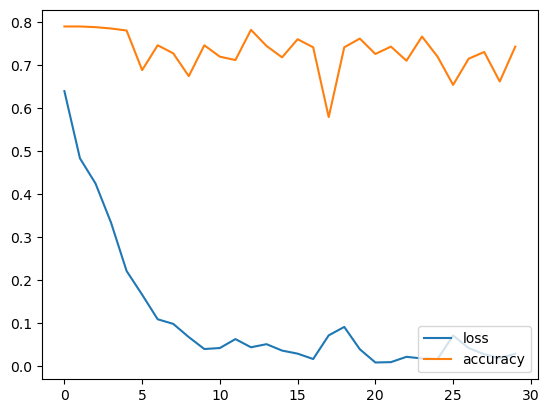

In [242]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

# Prediction

In [247]:
pred = top_layer.predict(X_test)

20/20 [==============================] - 0s 7ms/step


In [248]:
y_pred = pd.DataFrame(pred > 0.5)[0].astype('int64').values
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [249]:
y_test.mean()

0.790625

In [250]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [251]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

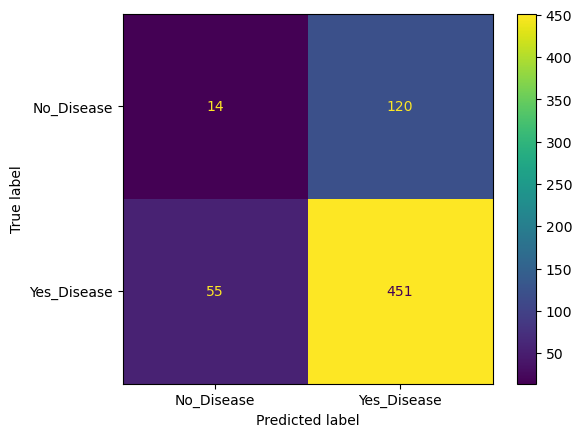

In [252]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No_Disease', 'Yes_Disease'])
cm_display.plot()

# 4. Tesing Out Prebuilt Networks -  EfficientNetB5 as convolution base


In [253]:
from keras.applications import EfficientNetB5

In [254]:
conv_base = EfficientNetB5(include_top = False, input_shape = (150, 150, 3))

In [255]:
from keras.utils import plot_model

In [256]:
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [257]:
# X-train, X-test, y-train, y-test

In [258]:
X_train = conv_base.predict(train_data_augmented)
X_test = conv_base.predict(test_data_augmented)
y_train = train_data_augmented.labels
y_test = test_data_augmented.labels

20/20 [==============================] - 133s 6s/step


# Putting EfficientNetB5 to work

In [259]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical

In [260]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(1, activation = 'sigmoid'))

In [261]:
import tensorflow
from keras import metrics
top_layer.compile(loss='bce',
              optimizer='adam', metrics = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR'), # precision-recall curve
])

In [262]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 5s 64ms/step - loss: 1.0947 - tp: 1413.0000 - fp: 370.0000 - tn: 31.0000 - fn: 106.0000 - accuracy: 0.7521 - precision: 0.7925 - recall: 0.9302 - auc: 0.4896 - prc: 0.7861 - val_loss: 0.5137 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.5125 - val_prc: 0.7982
Epoch 2/20
60/60 [==============================] - 3s 56ms/step - loss: 0.5302 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.7911 - precision: 0.7911 - recall: 1.0000 - auc: 0.5208 - prc: 0.8046 - val_loss: 0.5160 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.4893 - val_prc: 0.7772
Epoch 3/20
60/60 [==============================] - 3s 55ms/step - loss: 0.5299 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e

{'verbose': 1, 'epochs': 20, 'steps': 60}
dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc'])


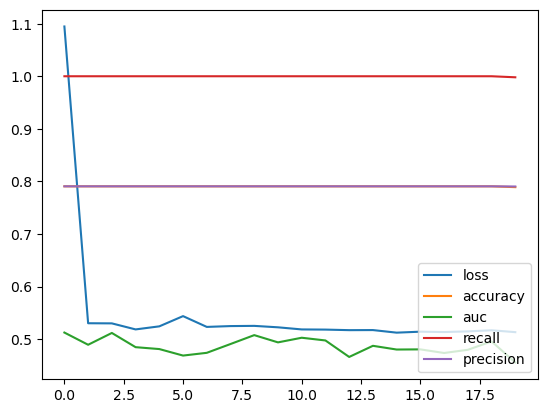

In [264]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.plot(hist.history['val_auc'], label ='auc')
plt.plot(hist.history['val_recall'], label ='recall')
plt.plot(hist.history['val_precision'], label ='precision')
plt.legend(loc = 'lower right');

# Prediction

In [265]:
pred = top_layer.predict(X_test)

20/20 [==============================] - 0s 10ms/step


In [266]:
y_pred = pd.DataFrame(pred > 0.5)[0].astype('int64').values
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [267]:
y_test.mean()

0.790625

In [268]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [269]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


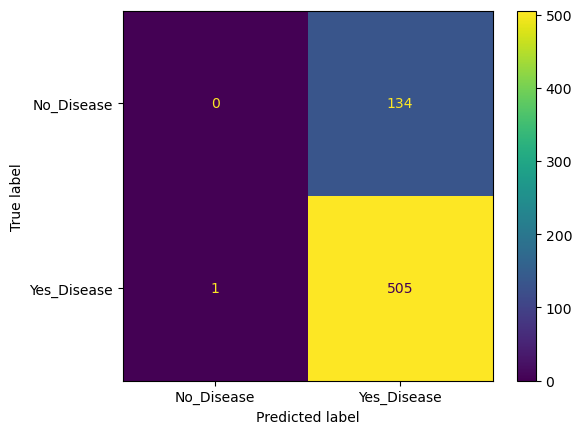

In [270]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No_Disease', 'Yes_Disease'])
cm_display.plot()

# Testing out SE-ResNeXt

In [55]:
#!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /private/var/folders/w0/sh538wjn68n6sktngvrggw480000gn/T/pip-req-build-nk84pks8
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /private/var/folders/w0/sh538wjn68n6sktngvrggw480000gn/T/pip-req-build-nk84pks8
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20027 sha256=d0795ac6a856c0ef71c2233addffca9f2dca2263723b0ae788824d07ee15a47e
  Stored in directory: /private/var/folders/w0/sh538wjn68n6sktngvrggw480000gn/T/pip-ephem-wheel-cache-bk9virkm/wheels/e7/c3/c8/78c1f9edf72d00198ac018396707125272de9c1abdd99a4043
Successfully built image-classifiers


In [271]:
# for keras
from classification_models.keras import Classifiers

In [272]:
ResNeXt50, preprocess_input = Classifiers.get('resnext50')
model = ResNeXt50(include_top = False, input_shape=(224, 224, 3), weights='imagenet')

In [ ]:
# X-train, X-test, y-train, y-test

In [273]:
X_train = model.predict(train_data_augmented)
X_test = model.predict(test_data_augmented)
y_train = train_data_augmented.labels
y_test = test_data_augmented.labels

20/20 [==============================] - 112s 5s/step


# Putting SE-ResNeXt to work

In [274]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical

In [275]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(1, activation = 'sigmoid'))

In [276]:
import tensorflow
from keras import metrics
top_layer.compile(loss='bce',
              optimizer='adam', metrics = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR'), # precision-recall curve
])

In [277]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=20, verbose=1)

Epoch 1/20
60/60 [==============================] - 5s 64ms/step - loss: 0.7145 - tp: 1455.0000 - fp: 387.0000 - tn: 14.0000 - fn: 64.0000 - accuracy: 0.7651 - precision: 0.7899 - recall: 0.9579 - auc: 0.4582 - prc: 0.7688 - val_loss: 0.5249 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.5016 - val_prc: 0.7927
Epoch 2/20
60/60 [==============================] - 3s 54ms/step - loss: 0.5232 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.7911 - precision: 0.7911 - recall: 1.0000 - auc: 0.4915 - prc: 0.7880 - val_loss: 0.5162 - val_tp: 506.0000 - val_fp: 134.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.7906 - val_precision: 0.7906 - val_recall: 1.0000 - val_auc: 0.5002 - val_prc: 0.8037
Epoch 3/20
60/60 [==============================] - 3s 55ms/step - loss: 0.5208 - tp: 1519.0000 - fp: 401.0000 - tn: 0.0000e+00 - fn: 0.0000e+

{'verbose': 1, 'epochs': 20, 'steps': 60}
dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc'])


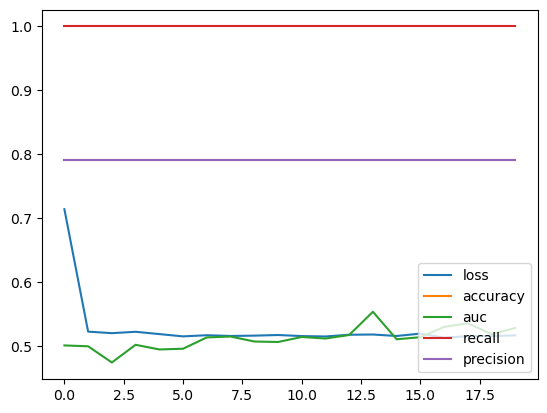

In [278]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.plot(hist.history['val_auc'], label ='auc')
plt.plot(hist.history['val_recall'], label ='recall')
plt.plot(hist.history['val_precision'], label ='precision')
plt.legend(loc = 'lower right');

# Prediction

In [279]:
pred = top_layer.predict(X_test)

20/20 [==============================] - 0s 9ms/step


In [280]:
y_pred = pd.DataFrame(pred > 0.5)[0].astype('int64').values
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [281]:
y_test.mean()

0.790625

In [282]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [283]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


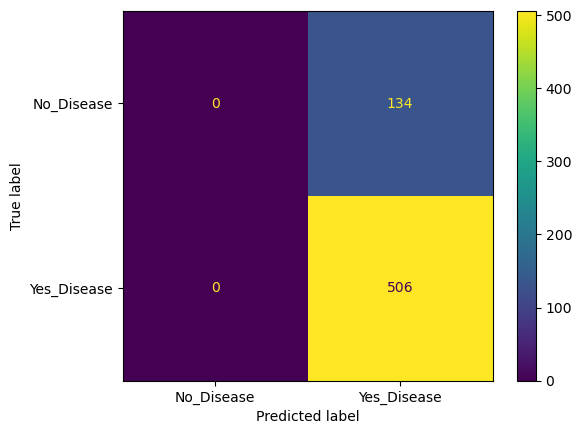

In [284]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No_Disease', 'Yes_Disease'])
cm_display.plot()

In [ ]:
# Save the model for streamlit deployment

In [105]:
conv_base.save("/Users/kamwingsze/GA/conv_base.keras")

In [106]:
top_layer.save("/Users/kamwingsze/GA/top_layer.keras")